In [71]:
# Script page for ASTRO 400B Project
# Currently no comments still testing and writing and thinking
# Tyler Baines
# Spring 2018

In [1]:
# Import Modules
import numpy as np
import astropy.units as u
import astropy.table as tbl
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline
# Import my Modules
from Readfile import Read
#from GalaxyMass import ComponentMass
from FindFiles import FileFinder
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

In [2]:
Times = np.array([0.0, 4.79, 6.07, 10.3])
MW_files = FileFinder("MW", Times) 
M31_files = FileFinder("M31", Times)

Bulge_index = 3

print ("%s\n%s" % (MW_files, M31_files))


['MW_000', 'MW_335', 'MW_425', 'MW_721']
['M31_000', 'M31_335', 'M31_425', 'M31_721']


In [3]:
Snaps = np.array([0,335,425,721])    

In [4]:
def Data_File(Galaxy, Snap, ptype, variable_type, r_grid_n = 50,):
    
    r_grid = np.geomspace(0.01,30, r_grid_n, endpoint=True)
    Mass_Profile = MassProfile(Galaxy, Snap)
    
    if variable_type == "M":
        Mass_Bulge_grid = Mass_Profile.MassEnclosed(ptype, r_grid)
        File = np.concatenate((r_grid, Mass_Bulge_grid), axis = 0).reshape(2,len(R_array)).T
        filename = str(Galaxy)+"_"+str(Snap)+"_MassProfile.dat"
        header = "variables: R, Bulge Mass"
        np.savetxt(filename, File, header= header, comments="#")
    elif variable_type == "V":
        Velocity_Bulge_grid = Mass_Profile.CircularVelocity(ptype, r_grid)
        File = np.concatenate((r_grid, Velocity_Bulge_grid), axis = 0).reshape(2, len(R_array)).T
        filename = str(Galaxy)+"_"+str(Snap)+"_Velocity_Profile.dat"
        header = "variables: R, Bulge Mass"
        np.savetxt(filename, File, header= header, comments="#")
    elif variable_type == "D":
        Mass_Bulge_grid = Mass_Profile.MassEnclosed(ptype, r_grid)
        Density_Bulge_grid = 3*MW_Mass_Bulge/(4*np.pi*R_array**3)
        File = np.concatenate((r_grid, Density_Bulge_grid), axis = 0).reshape(2,len(R_array)).T
        filename = str(Galaxy)+"_"+str(Snap)+"_DensityProfile.dat"
        header = "variables: R, Bulge Mass"
        np.savetxt(filename, File, header= header, comments="#")        
    
    
    

#Make Data Files
for ii in range(len(Snaps)):
    print (Snaps[ii])
    Data_File("MW", Snaps[ii], Bulge_index, "M")
    Data_File("MW", Snaps[ii], Bulge_index, "V")
    Data_File("M31", Snaps[ii],Bulge_index, "M")
    Data_File("M31", Snaps[ii],Bulge_index, "V")

In [5]:
#lOAD AND PLOT DATA FILES
Data_files_Mass_MW = ["MW_0_MassProfile.dat", "MW_335_MassProfile.dat", "MW_425_MassProfile.dat", "MW_721_MassProfile.dat"]
Data_files_Velocity_MW = ["MW_0_Velocity_Profile.dat", "MW_335_Velocity_Profile.dat", "MW_425_Velocity_Profile.dat", "MW_721_Velocity_Profile.dat"]
Data_files_Mass_M31 = ["M31_0_MassProfile.dat", "M31_335_MassProfile.dat", "M31_425_MassProfile.dat", "M31_721_MassProfile.dat"]
Data_files_Velocity_M31 = ["M31_0_Velocity_Profile.dat", "M31_335_Velocity_Profile.dat", "M31_425_Velocity_Profile.dat", "M31_721_Velocity_Profile.dat"]
colors = ['black', 'red', 'blue', 'gold']
ls = ['-', '--', '-.', ':']

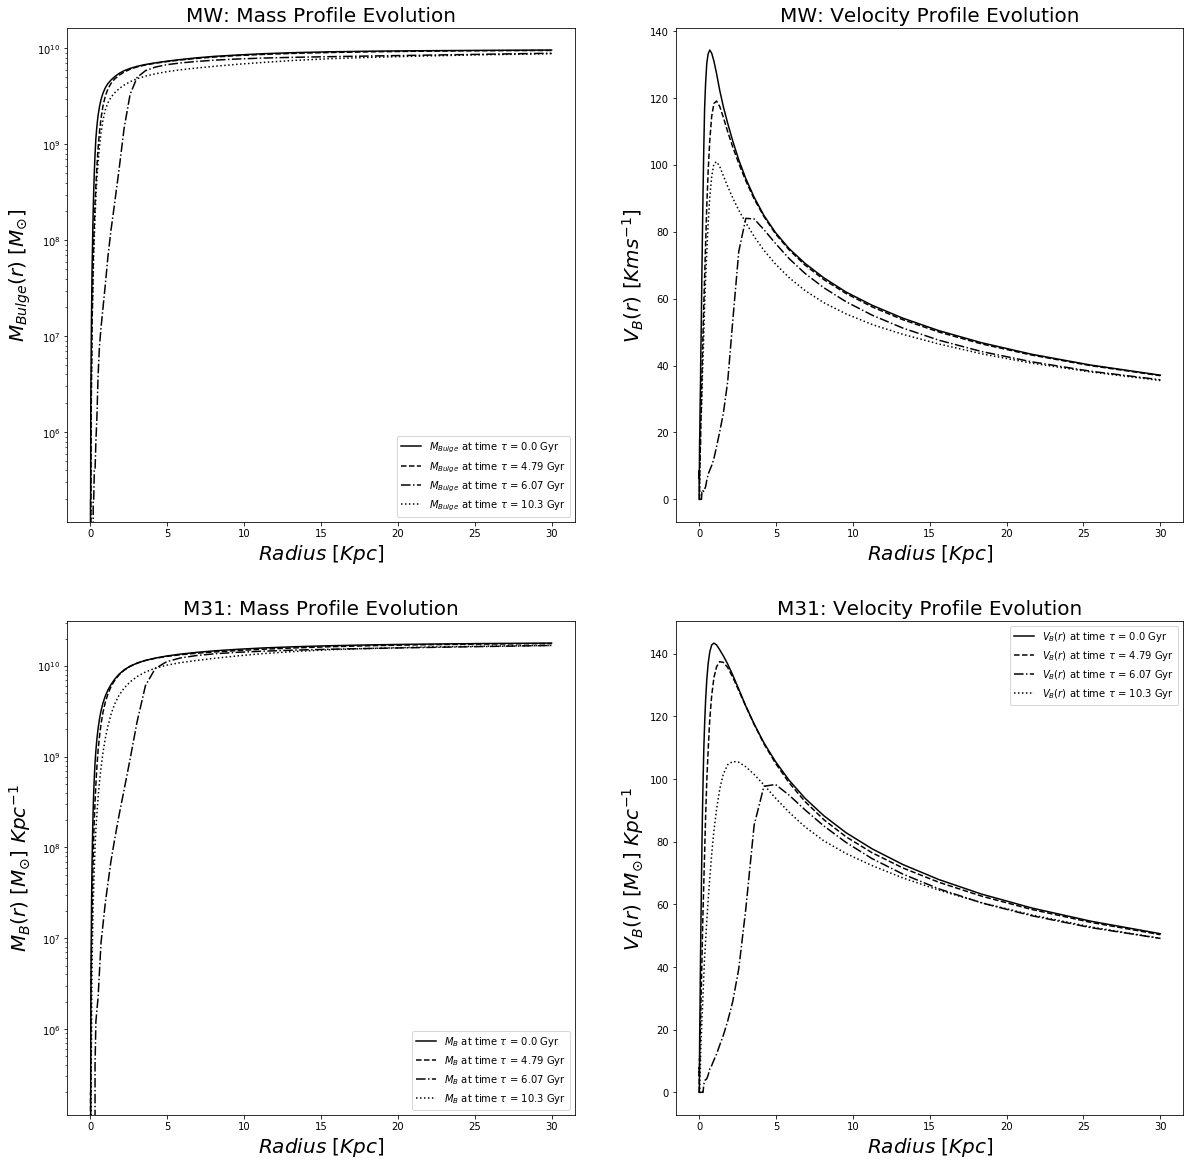

In [17]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace = 0.2)



plt.subplot(2,2,1)
#plt.axis([-1, 30, 1e9, 1.1e10])
plt.title("MW: Mass Profile Evolution", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$", fontsize = 20)
plt.ylabel("$M_{Bulge}(r)$ $[M_{\odot}]$", fontsize = 20)
for file in range(len(Data_files_Mass_MW)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Mass_MW[file], comments="#")
    
    #Plot data
    plt.semilogy(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$M_{Bulge}$ at time $\\tau$ = " + str(Times[file])+" Gyr")
plt.legend()    
plt.subplot(2,2,2)
plt.title("MW: Velocity Profile Evolution", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$", fontsize = 20)
plt.ylabel("$V_{B}(r)$ $[Kms^{-1}]$", fontsize = 20)
for file in range(len(Data_files_Velocity_MW)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Velocity_MW[file], comments="#")
    plt.plot(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$M_{B}$ at time $\\tau$ = " + str(Times[file])+" Gyr")
plt.legend
    
plt.subplot(2,2,3)
plt.title("M31: Mass Profile Evolution", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$", fontsize = 20)
plt.ylabel("$M_{B}(r)$ $[M_{\odot}]$ $Kpc^{-1}$", fontsize = 20)
#plt.axis([-1, 30, 1e9, 2e10])
for file in range(len(Data_files_Mass_M31)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Mass_M31[file], comments="#")

    
    #Plot data
    plt.semilogy(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$M_{B}$ at time $\\tau$ = " + str(Times[file])+" Gyr")
plt.legend()    

plt.subplot(2,2,4)
plt.title("M31: Velocity Profile Evolution", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$", fontsize = 20)
plt.ylabel("$V_{B}(r)$ $[M_{\odot}]$ $Kpc^{-1}$", fontsize = 20)
for file in range(len(Data_files_Velocity_M31)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Velocity_M31[file], comments="#")

    
    #Plot data
    plt.plot(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$V_{B}(r)$ at time $\\tau$ = " + str(Times[file])+" Gyr")
plt.legend()    

In [7]:
# Make merger file
path_MW = "C:\\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\MW_HighRes\MW_721.txt"
path_M31 = "C:\\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\M31_HighRes\M31_721.txt"
MW_merger = np.genfromtxt(path_MW, skip_header = 3, comments = "#")
M31_merger = np.genfromtxt(path_M31, skip_header = 3, comments="#")
Remnant = np.concatenate((MW_merger[:,1], M31_merger[:,1]), axis = 0)
#print (Velocity_Merger.shape)

#plt.hist(Velocity_Merger, bins = 20)

Remnant = np.concatenate((MW_merger, M31_merger), axis = 0)
np.savetxt("MW_M31_Remnant_721.dat", Remnant)


In [8]:
MW_M31_REMNANT_COM = CenterOfMass("MW_M31_Remnant_721",3)
    

In [67]:
Remnant_Total = MW_M31_REMNANT_COM.total_mass()

print(Remnant_Total/1e10)

2.905496999999999 solMass


In [9]:
Remnant_COMP = MW_M31_REMNANT_COM.COM_P(0.1, 4.0)
Remnant_COMV = MW_M31_REMNANT_COM.COM_V(Remnant_COMP[0],Remnant_COMP[1],Remnant_COMP[2])


In [10]:
xR = MW_M31_REMNANT_COM.x - float(Remnant_COMP[0])
yR = MW_M31_REMNANT_COM.y - float(Remnant_COMP[1])
zR = MW_M31_REMNANT_COM.z - float(Remnant_COMP[2])

vxR = MW_M31_REMNANT_COM.vx - float(Remnant_COMV[0])
vyR = MW_M31_REMNANT_COM.vy - float(Remnant_COMV[1])
vzR = MW_M31_REMNANT_COM.vz - float(Remnant_COMV[2])

#index = np.where(abs(vxR) <= 400)

110.93027210186317
231.04067777431501
118.89740367088835
217.79150203841323
345.17841733717074


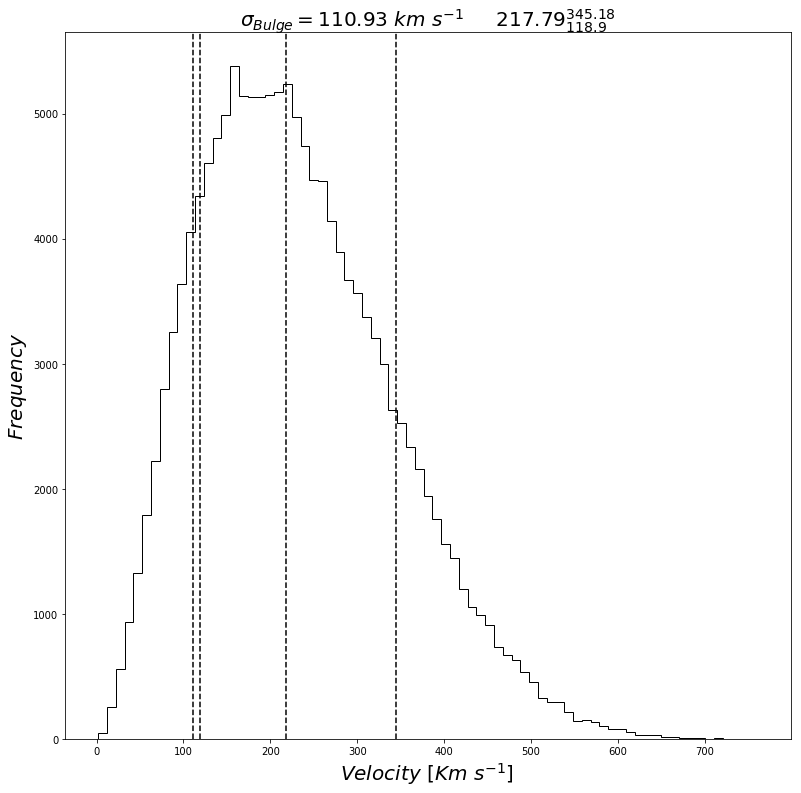

In [21]:
v_mag = np.sqrt(vxR**2 + vyR**2 + vzR**2)
uncertainty = "$"+str(np.round(np.percentile(v_mag, 50),2))+"_{"+str(np.round(np.percentile(v_mag, 16),2))+"}^{"+str(np.round(np.percentile(v_mag, 84),2))+"}$"
std = np.std(v_mag)
fig1 = plt.figure(figsize=(13,13))
plt.title("$\sigma_{Bulge}=$"+str(np.round(std,2))+" $km$ $s^{-1}$     "+uncertainty, fontsize = 20)
plt.xlabel("$Velocity$ [$Km$ $s^{-1}$] ", fontsize = 20)
plt.ylabel("$Frequency$", fontsize = 20)
plt.hist(v_mag, bins = 75, color = 'black', histtype="step")
plt.axvline(np.percentile(v_mag, 16), color = 'black', ls = '--')
plt.axvline(np.percentile(v_mag, 50), color = 'black', ls = '--')
plt.axvline(np.percentile(v_mag, 84), color = 'black', ls = '--')
plt.axvline(110.93, color = 'black', ls = '--')

std = np.std(v_mag)
print (std)
print (np.mean(v_mag))
print (np.percentile(v_mag, 16))
print (np.percentile(v_mag, 50))
print (np.percentile(v_mag, 84))
       

In [62]:
# Determine Re: The Half Mass Radius
def HalfMassRadius(Bmass,R,tot):
    # input, Bulge mass profile, Radius, Total Mass of Bulge
    # returns: Radius where mass is half the total mass 
  
    # half the total mass in units of 1e10
    HalfMass= tot/2.0/1e10
    
    # find where mass profile yields half the total mass 
    # note the use of "np.logical_and"   
    index = np.where( np.logical_and(Bmass/1e10 < (HalfMass+0.1), Bmass/1e10 > (HalfMass-0.1)))
 
    return R[index]

def Sersic_Model(Re,r,n,ML,Mtot,C):

    # luminosity
    L = Mtot/ML
    # Ie = L/7.2/pi/Re**2
    Ie = L/7.2/np.pi/Re**2
        
    return Ie*np.exp(-7.67*((r/Re)**(1.0/n)-C))

In [63]:
# For sersic Profile

#Determine Half Mass Radius for Bulge 
#Re = HalfMassRadius(BulgeMass['Bulge'],BulgeMass['R'],Btot)
#print(Re)



In [72]:
A = "M31_000"
print (A[:-4])

M31


In [71]:
filename = "MW_000"
path = "C:\\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\MW_HighRes\\"+filename+".txt"
if filename[:-4] == "MW":
    print (path)

C:\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\MW_HighRes\MW_000.txt


In [61]:
def VirialTheorem(r, v_r, Str, fudge):
    # This function takes inputs: R_grid - [radial component of dataset] [array]
    #                             V_grid - velocity as a function (r) [from dataset][array]
    #                             Str =  String to indicate dispersion or rotational
    
    
    #Store G = 4.498768e-6 without units [kpc3/M_sun/Gyr] 
    G = 4.498768e-6
    if Str == "Dispersion":
        
        # Convert from Km/s to Kpc/Gyr
        # 3.24078e-17 Kpc per Km
        # 3.16e16 seconds per Gyr
        Dispersion_sigma = v_r * 3.24078e-17 * 3.16e16 
        
        # Expression for Viral Theorem in solar masses
        Total_Mass_at_r = r * Dispersion_sigma**2 / G * fudge
        
        
    elif Str == "Rotational":
    
        Total_Mass_at_r = r * v_r**2 / G
    
    return Total_Mass_at_r

In [52]:
r_array = np.geomspace(0.1,30, endpoint= True)

Remnant_profile = MassProfile("MW_M31_Remnant", 721)


TypeError: __init__() takes 3 positional arguments but 4 were given

In [26]:
Rem_enclosed = Remnant_profile.MassEnclosed(Bulge_index, r_array)

In [62]:
M_virial = VirialTheorem(r_array, 110.93, "Dispersion", 1)

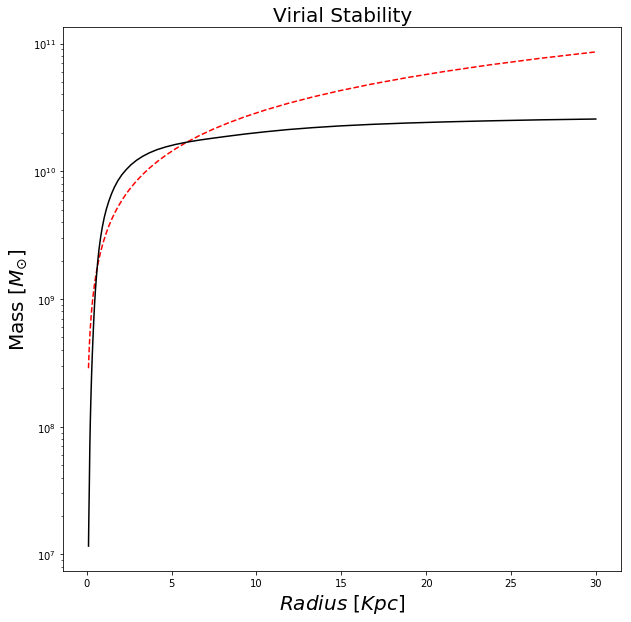

In [64]:
f = plt.figure(figsize=(10,10))
plt.title("Virial Stability", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$",fontsize = 20)
plt.ylabel("Mass [$M_{\odot}$]", fontsize =20)
plt.semilogy(r_array, M_virial, "r--")
plt.semilogy(r_array, Rem_enclosed, "k-")

# Notes
1. Virial Stability looks weird,
2. Need to do Sersic Profile on remnant and fit
3. Start filling in sections
4. Start saving plots after consulting with Prof. or TA
5. 